In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
i = np.ones((512, 512))
i = i * 255
i = np.uint8(i)
cv2.imwrite('test.png', i)

True

In [3]:
i[256:512, : ] = 0
i[0:256, :] = 127

Create colored image

In [4]:
#1st blue, 2nd Green, 3rd Red
i = np.ones((512, 512, 3))
i[:,:,1:3] = 255
i = np.uint8(i)
cv2.imwrite('color.png', i)

True

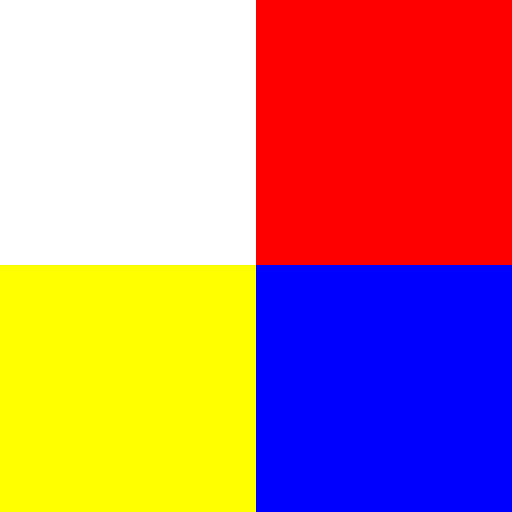

In [5]:
# Creating above image
# white, red, yellow,blue
i = np.ones((512, 512, 3))
i[:,:,0:3] = 0
i[:265, :256, :] = 255 #white
i[:265, 256:, 2] = 255 #Red
i[265:, :256, 1:3] = 255 #Yellow
i[265:, 256:, 0] = 255 #Blue
i = np.uint8(i)
cv2.imwrite('color.png', i)

True

Image Therosheldin on lena image

In [6]:
lena = cv2.imread('lena.png')[:,:,0]
s = lena.shape
threshold = np.zeros(s)
for i in range(s[0]):
  for j in range(s[1]):
    if(lena[i,j]>127):
      threshold[i,j] = 255
    else:
      threshold[i,j] = 0
threshold = np.uint8(threshold)
cv2.imwrite('lenathreshold.png', threshold)

True

In [7]:
def showImage(img):
  cv2.imshow('Test', img)
  #cv2.imwrite('lenathreshold.png', threshold)
  cv2.waitKey(0) 
    
  # closing all open windows 
  cv2.destroyAllWindows() 

In [8]:
lena = cv2.imread('lena.png')[:,:,0]
s = lena.shape
threshold = np.zeros(s)
for i in range(s[0]):
  for j in range(s[1]):
    threshold[i,j] = 255 - lena[i,j]
    
threshold = np.uint8(threshold)
#plt.plot(threshold)
showImage(threshold)

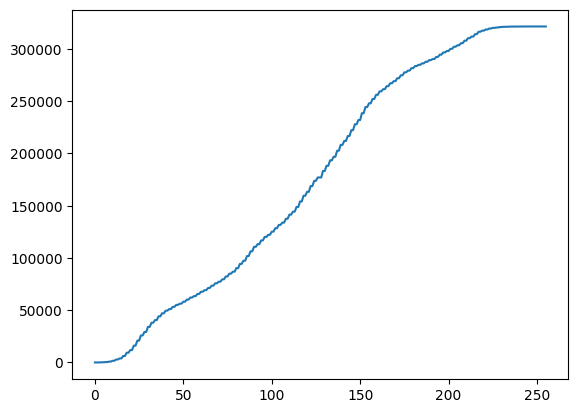

In [9]:
lena = cv2.imread('lena.png')[:,:,0]
s = lena.shape

hist = np.zeros(256)
for i in range(s[0]):
    for j in range(s[1]):
        pixel = lena[i,j]
        hist[pixel] = hist[pixel]+1
cum_hist = np.zeros(256)
cum_hist[0] = hist[0]
for i in range(1,256):
    cum_hist[i] = hist[i]+cum_hist[i-1]

plt.plot(cum_hist)
norm_cum_hist = cum_hist/cum_hist[-1]
norm_cum_hist = norm_cum_hist*255

new_image = np.zeros(s)

for i in range(s[0]):
    for j in range(s[1]):
        pixel = lena[i,j]
        new_image[i,j] = round(norm_cum_hist[pixel])

cv2.imwrite("input_hist_eq.png",new_image)
showImage(new_image)

# Bluering an image

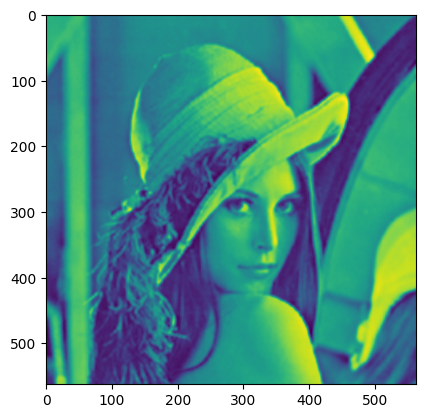

In [10]:
lena = cv2.imread('lena.png')[:,:,0]
s = lena.shape
#kernal = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9

kernal = np.ones((5,5))
kernal = kernal/np.sum(kernal)
kernalShape = kernal.shape

partImg = np.zeros((s[0]-kernalShape[0] + 1, s[1]-kernalShape[1] + 1))
partImgShape = partImg.shape

for i in range(partImgShape[0]):
  for j in range(partImgShape[1]):
    tempImg = lena[i:i+kernalShape[0], j: j+kernalShape[1]]
    output = tempImg * kernal
    partImg[i,j] = np.sum(output)
    

cv2.imwrite("bluredImg.png",partImg)
plt.imshow(partImg)

ShowWell kernal

Hysteresis -->> picking thereshold in between 

Canny edge is equivalent to verical and horigental edge + hystresis

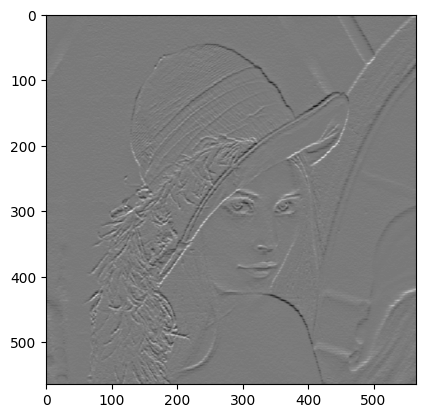

In [25]:
lena = cv2.imread('lena.png')[:,:,0]
s = lena.shape
kernal = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])#Vertical edge detection
kernal = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])#Horigental edge detection

#kernal = np.ones((5,5))
#kernal = kernal/np.sum(kernal)
kernalShape = kernal.shape

partImg = np.zeros((s[0]-kernalShape[0] + 1, s[1]-kernalShape[1] + 1))
partImgShape = partImg.shape

for i in range(partImgShape[0]):
  for j in range(partImgShape[1]):
    tempImg = lena[i:i+kernalShape[0], j: j+kernalShape[1]]
    output = tempImg * kernal
    partImg[i,j] = np.sum(output)
    

cv2.imwrite("bluredImg.png",partImg)
plt.imshow(partImg, cmap='gray')

In [12]:
def showWell(img, kernal):
  s = img.shape
  kernalShape = kernal.shape

  partImg = np.zeros((s[0]-kernalShape[0] + 1, s[1]-kernalShape[1] + 1))
  partImgShape = partImg.shape

  for i in range(partImgShape[0]):
    for j in range(partImgShape[1]):
      tempImg = img[i:i+kernalShape[0], j: j+kernalShape[1]]
      output = tempImg * kernal
      partImg[i,j] = np.sum(output)
      
  return partImg

In [23]:
lena = cv2.imread('lena.png')[:,:,0]
kernal_V = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])#Vertical edge detection
kernal_H = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])#Horigental edge detection
kernal_S = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])#Sharpning image


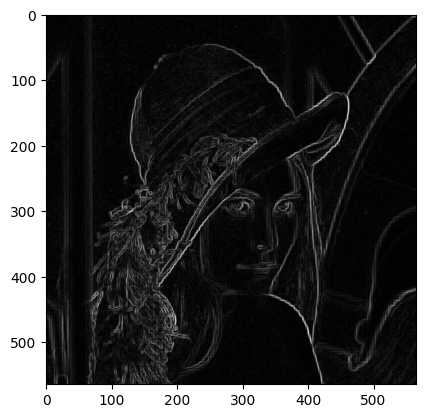

In [17]:

imgV = showWell(lena, kernal_V)
imgH = showWell(lena, kernal_H)

imgV = np.double(imgV)
imgH = np.double(imgH)
Ans = np.sqrt(imgV**2+imgH**2)

Ans_n = (Ans-np.min(Ans))/(np.max(Ans)-np.min(Ans))
Ans_n = Ans_n*255
Ans_n = np.uint8(Ans_n)        

cv2.imwrite("bluredImg.png",Ans_n)
plt.imshow(Ans_n, cmap='gray')

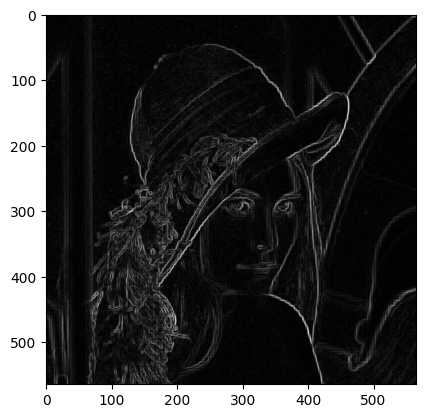

In [24]:
imgS = showWell(lena, kernal_S)
cv2.imwrite("sharped.png",imgS)
plt.imshow(Ans_n, cmap='gray')